# Importing Dataset

In [1]:
# data processing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn import metrics  
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder


import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
foodcost=pd.read_excel('Restrauntfoodcost.xlsx')

In [3]:
foodcost.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
foodcost['VOTES'].isnull().sum()

1204

In [5]:
foodcost['VOTES']=foodcost['VOTES'].str.replace('votes',' ')

In [6]:
foodcost['VOTES']=foodcost['VOTES'].fillna('0')

In [7]:
foodcost['VOTES'].isnull().sum()

0

In [8]:
foodcost['TIME'].value_counts()

11am – 11pm (Mon-Sun)                                  1415
12noon – 12midnight (Mon-Sun)                           469
12noon – 11pm (Mon-Sun)                                 407
11am – 12midnight (Mon-Sun)                             310
10am – 10pm (Mon-Sun)                                   221
                                                       ... 
12:30pm – 4pm, 6:30pm – 10:30pm (Mon-Sun)                 1
6:30am – 10:30am, 12:30pm – 3pm, 6pm – 11:30pm...         1
4:30pm – 11pm (Mon, Wed, Thu, Fri, Sat, Sun)...           1
12:30pm – 2:45pm, 7pm – 11:45pm (Mon-Sat),12noon...       1
(Mon),12noon – 4pm, 7pm – 10:30pm...                      1
Name: TIME, Length: 2689, dtype: int64

# Data analysis

In [9]:
# Analysing Titles 

titles = list(foodcost['TITLE'])

# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum Titles in a Cell : ", maxim)    

all_titles = []

for i in titles :
    if len(i.split(',')) == 1:
         all_titles.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            all_titles.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Titles : ", len(pd.Series(all_titles).unique()))
print("\n\nUnique Titles:\n", pd.Series(all_titles).unique())

all_titles = list(pd.Series(all_titles).unique())

# Analysing cuisines 

cuisines = list(foodcost['CUISINES'])

maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum cuisines in a Cell : ", maxim)    

all_cuisines = []

for i in cuisines :
    if len(i.split(',')) == 1:
         #print(i.split(',')[0])
         all_cuisines.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            #print(i.split(',')[it])
            all_cuisines.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Cuisines : ", len(pd.Series(all_cuisines).unique()))
print("\n\nUnique Cuisines:\n", pd.Series(all_cuisines).unique())

all_cuisines = list(pd.Series(all_cuisines).unique())

# Analysing CITY

all_cities = list(foodcost['CITY'])

for i in range(len(all_cities)):
    if type(all_cities[i]) == float:
        all_cities[i] = 'NOT AVAILABLE'
    all_cities[i] = all_cities[i].strip().upper()
        
print("\n\nNumber of Unique cities (Including NOT AVAILABLE): ", len(pd.Series(all_cities).unique()))
print("\n\nUnique Cities:\n", pd.Series(all_cities).unique())
 
all_cities = list(pd.Series(all_cities).unique())


# Cleaning LOCALITY

all_localities = list(foodcost['LOCALITY'])

for i in range(len(all_localities)):
    if type(all_localities[i]) == float:
        all_localities[i] = 'NOT AVAILABLE'
    all_localities[i] = all_localities[i].strip().upper()
        
print("\n\nNumber of Unique Localities (Including NOT AVAILABLE) : ", len(pd.Series(all_localities).unique()))
print("\n\nUnique Localities:\n", pd.Series(all_localities).unique())

all_localities = list(pd.Series(all_localities).unique())



Maximum Titles in a Cell :  2


Number of Unique Titles :  24


Unique Titles:
 ['CASUAL DINING' 'BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'BEVERAGE SHOP' 'IRANI CAFE' 'BAKERY' 'NONE' 'PUB'
 'FINE DINING' 'SWEET SHOP' 'LOUNGE' 'FOOD COURT' 'FOOD TRUCK' 'MESS'
 'KIOSK' 'CLUB' 'CONFECTIONERY' 'DHABA' 'MEAT SHOP' 'COCKTAIL BAR'
 'PAAN SHOP']


Maximum cuisines in a Cell :  8


Number of Unique Cuisines :  125


Unique Cuisines:
 ['MALWANI' 'GOAN' 'NORTH INDIAN' 'ASIAN' 'MODERN INDIAN' 'JAPANESE'
 'CHINESE' 'BIRYANI' 'HYDERABADI' 'TIBETAN' 'DESSERTS' 'SEAFOOD' 'CAFE'
 'PIZZA' 'BURGER' 'BAR FOOD' 'SOUTH INDIAN' 'FAST FOOD' 'BEVERAGES'
 'ARABIAN' 'MUGHLAI' 'MAHARASHTRIAN' 'PARSI' 'THAI' 'BAKERY' 'MOMOS'
 'CONTINENTAL' 'EUROPEAN' 'ROLLS' 'ANDHRA' 'ITALIAN' 'BBQ' 'FINGER FOOD'
 'TEA' 'AMERICAN' 'HEALTHY FOOD' 'COFFEE' 'INDONESIAN' 'KOREAN' 'NEPALESE'
 'ICE CREAM' 'MEXICAN' 'KERALA' 'INDIAN' 'MITHAI' 'STREET FOOD'
 'MALAYSIAN' 'VIETNAMESE' 'IRANIAN' 'KEBAB' 'JUICES' 'SANDWIC

In [10]:
# Cleaning Training Set
#______________________

# TITLE


titles = list(foodcost['TITLE'])

# Since Maximum number of titles in a cell is 2 will will split title in to 2 columns
T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')

# appending NONE to Unique titles list
all_titles.append('NONE')

#Cleaning CUISINES 

cuisines = list(foodcost['CUISINES'])
   
# Since Maximum number of cuisines in a cell is 8 will will split title in to 8 columns
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

# appending NONE to Unique cuisines list
all_cuisines.append('NONE')

# Cleaning CITY

cities = list(foodcost['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip().upper()
        

# Cleaning LOCALITY

localities = list(foodcost['LOCALITY'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip().upper()   
    

#Cleaning Rating

rates = list(foodcost['RATING'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan


# Votes
       
votes = list(foodcost['VOTES'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass        

new_data_train = {}

new_data_train['TITLE1'] = T1
new_data_train['TITLE2'] = T2
new_data_train['RESTAURANT_ID'] = foodcost["RESTAURANT_ID"]
new_data_train['CUISINE1'] = C1
new_data_train['CUISINE2'] = C2
new_data_train['CUISINE3'] = C3
new_data_train['CUISINE4'] = C4
new_data_train['CUISINE5'] = C5
new_data_train['CUISINE6'] = C6
new_data_train['CUISINE7'] = C7
new_data_train['CUISINE8'] = C8
new_data_train['CITY'] = cities
new_data_train['LOCALITY'] = localities
new_data_train['RATING'] = rates
new_data_train['VOTES'] = votes
new_data_train['COST'] = foodcost["COST"]

new_data_train = pd.DataFrame(new_data_train)

Now i decided to not to use time feature.

In [30]:
new_data_train.head()

,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,4,19,70,44,87,85,85,85,85,85,327,279,3.6,49,1200
1,4,1,7,77,58,85,85,85,85,85,67,1038,4.2,30,1500
2,4,19,87,28,17,51,85,85,85,85,67,1093,3.8,221,800
3,22,19,121,28,85,85,85,85,85,85,225,127,4.1,24,800
4,8,19,33,85,85,85,85,85,85,85,225,613,3.8,165,300


Now data looking perfect ..

# Data Preprocessing


Dealing with missing values
Encoding categorical features
Feature Scaling

In [11]:
print("\n\nMissing Values in Training Set\n","#"*60)
print("\nContains NaN/Empty cells : ", new_data_train.isnull().values.any())
print("\nTotal empty cells by column\n","_"*60,"\n", new_data_train.isnull().sum())

new_data_train.fillna(0, inplace = True)

print("\n\nAfter Filling 0:\n","_"*60,"\n")
print("\nContains NaN/Empty cells : ", new_data_train.isnull().values.any())



Missing Values in Training Set
 ############################################################

Contains NaN/Empty cells :  True

Total empty cells by column
 ____________________________________________________________ 
 TITLE1              0
TITLE2              0
RESTAURANT_ID       0
CUISINE1            0
CUISINE2            0
CUISINE3            0
CUISINE4            0
CUISINE5            0
CUISINE6            0
CUISINE7            0
CUISINE8            0
CITY                0
LOCALITY            0
RATING           1204
VOTES               0
COST                0
dtype: int64


After Filling 0:
 ____________________________________________________________ 


Contains NaN/Empty cells :  False


In [12]:
# Encoding Categorical Variables
#_______________________________


from sklearn.preprocessing import LabelEncoder

le_titles = LabelEncoder()
le_cuisines = LabelEncoder()

le_city = LabelEncoder()

le_locality = LabelEncoder()


le_titles.fit(all_titles)
le_cuisines.fit(all_cuisines)

le_city.fit(all_cities)
le_locality.fit(all_localities)



# Training Set  

new_data_train['TITLE1'] = le_titles.transform(new_data_train['TITLE1'])
new_data_train['TITLE2'] = le_titles.transform(new_data_train['TITLE2'])


new_data_train['CUISINE1'] = le_cuisines.transform(new_data_train['CUISINE1'])
new_data_train['CUISINE2'] = le_cuisines.transform(new_data_train['CUISINE2'])
new_data_train['CUISINE3'] = le_cuisines.transform(new_data_train['CUISINE3'])
new_data_train['CUISINE4'] = le_cuisines.transform(new_data_train['CUISINE4'])
new_data_train['CUISINE5'] = le_cuisines.transform(new_data_train['CUISINE5'])
new_data_train['CUISINE6'] = le_cuisines.transform(new_data_train['CUISINE6'])
new_data_train['CUISINE7'] = le_cuisines.transform(new_data_train['CUISINE7'])
new_data_train['CUISINE8'] = le_cuisines.transform(new_data_train['CUISINE8'])


new_data_train['CITY'] = le_city.transform(new_data_train['CITY'])
new_data_train['LOCALITY'] = le_locality.transform(new_data_train['LOCALITY'])

In [13]:
new_data_train.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,4,19,9438,70,44,87,85,85,85,85,85,327,279,3.6,49,1200
1,4,1,13198,7,77,58,85,85,85,85,85,67,1038,4.2,30,1500
2,4,19,10915,87,28,17,51,85,85,85,85,67,1093,3.8,221,800
3,22,19,6346,121,28,85,85,85,85,85,85,225,127,4.1,24,800
4,8,19,15387,33,85,85,85,85,85,85,85,225,613,3.8,165,300


In [14]:
new_data_train.drop('RESTAURANT_ID',inplace=True,axis=1)

# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E287E7F348>,
      dtype=object)

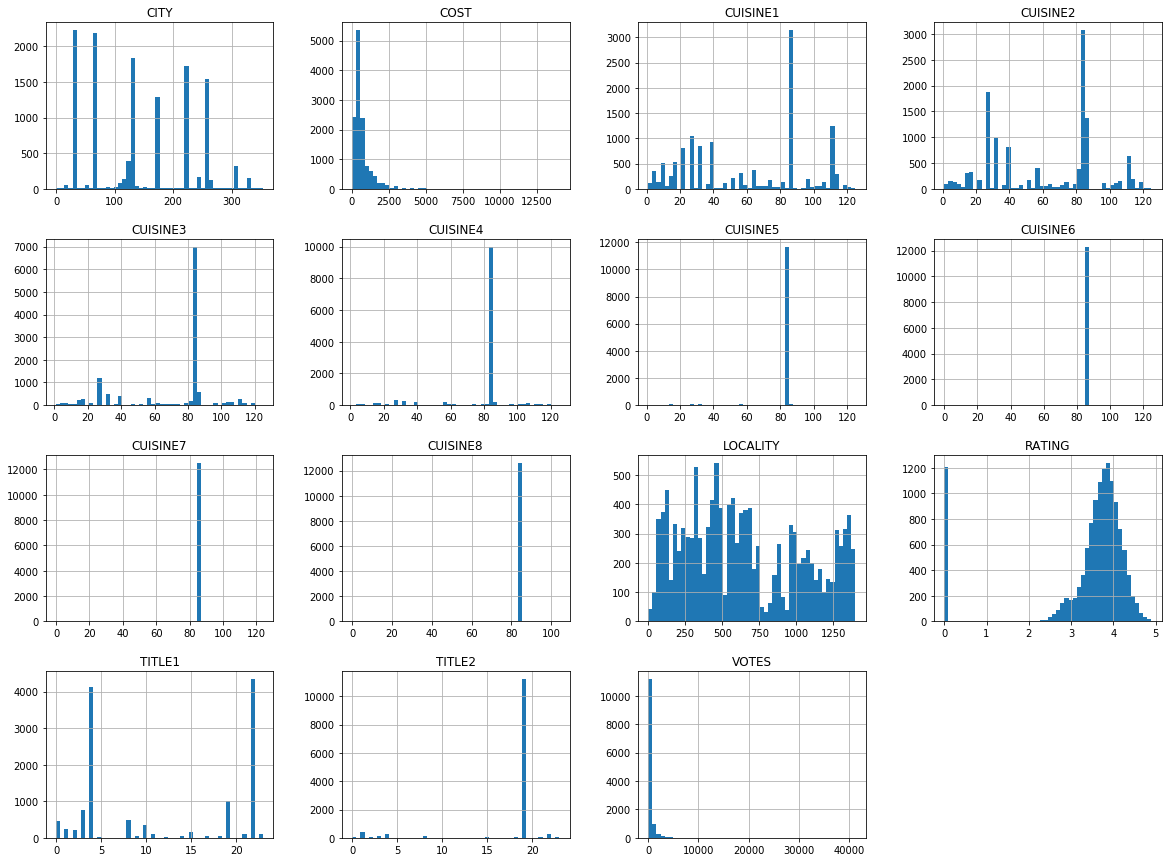

In [15]:
new_data_train.hist(bins=50, figsize=(20,15))

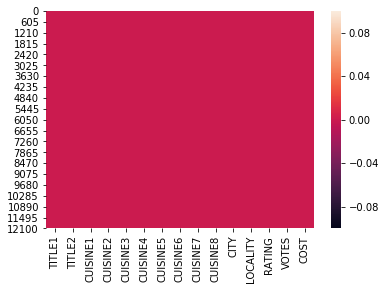

In [16]:
#check weather null values present or not
sns.heatmap(new_data_train.isnull())

From here you can observe that there is no null  values present in this dataset..

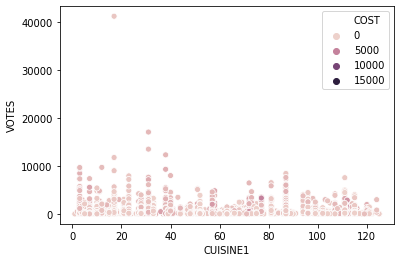

In [17]:
sns.scatterplot(x='CUISINE1',y='VOTES',hue='COST',data =new_data_train)

From above you can observe that for cuisine1 votes range in between 5000 cost is good.

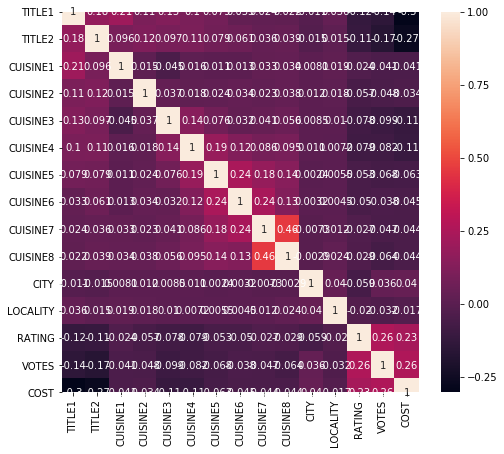

In [18]:
#to check Cor-relation
corr_hmap=new_data_train.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()


From above you can observe that data look's perfect .

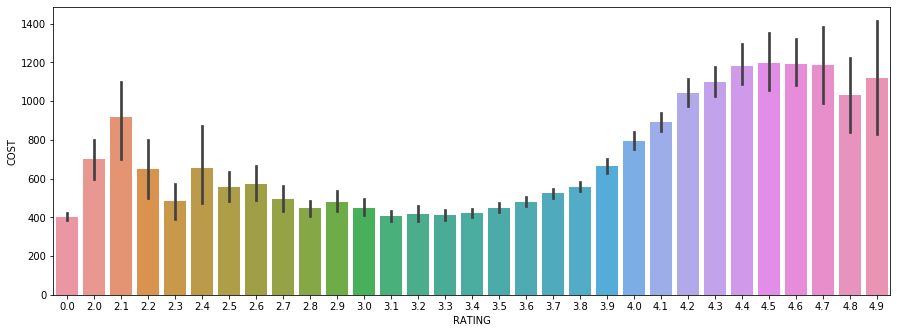

In [27]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
sns.barplot(x='RATING', y="COST", data=new_data_train)

* From above you can observe that where the cost is in between 800-1000 in these range rating is high compare to all other cost ,And where the cost of food is 400 in this case rating for the particular food is too low compare to all other cases ..
* And one thing we can come to final decision i.e. if the cost of food is low in most of the cases rating's also low..

# Identify and Removal of skewness

In [28]:
new_data_train.skew()

TITLE1       0.094060
TITLE2      -3.068802
CUISINE1     0.053850
CUISINE2    -0.127320
CUISINE3    -0.918185
CUISINE4    -2.152376
CUISINE5    -4.078806
CUISINE6    -6.963642
CUISINE7   -10.636633
CUISINE8   -13.853988
CITY         0.203776
LOCALITY     0.339891
RATING      -2.214271
VOTES       14.522617
COST         3.978801
dtype: float64

From above you can observe that no other feature contains skewness.It's perfect upto now...

And next step here is Building a machine learning model and implementing performance measures.

# Building Machine Learning Model

In [19]:
# Classifying Independent and Dependent Features


# Dependent Variable
y = new_data_train.iloc[:, -1].values  

# Independent Variables
x= new_data_train.iloc[:,: -1].values



In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=55)

In [21]:
lr=LinearRegression(normalize=True)
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

In [22]:
#prepare models
models=[]
models.append(('LinearRegression',lr))
models.append(('RandomForestRegressor',rfr)) 
models.append(('GradientBoostingRegressor',gbr))
#evaluate each model
Model=[]
Score=[]
MAE=[]
MSE=[]
RMSE=[]
RSquare=[]
for name,model in models:
    print('***********************',name,'************')
    Model.append(name)
    print('\n')
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    sr=model.score(x_train,y_train)
    print('score',sr)
    Score.append(sr*100)
    print('\n')
    print('Performance Measures:')
    mae=metrics.mean_absolute_error(y_test, pred)
    print('MAE',mae)
    MAE.append(mae)
    mse=metrics.mean_squared_error(y_test, pred)
    print('MSE',mse)
    MSE.append(mse)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE',rmse)
    RMSE.append(rmse)
    rsquare=metrics.r2_score(y_test,pred)
    print('R-square',rsquare)
    RSquare.append(rsquare)

*********************** LinearRegression ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


score 0.19628844634584253


Performance Measures:
MAE 303.43438364736085
MSE 257343.966919109
RMSE 507.29081099415646
R-square 0.23007151705908824
*********************** RandomForestRegressor ************


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


score 0.9443610500834325


Performance Measures:
MAE 182.42273631280722
MSE 86518.24928345386
RMSE 294.1398464734995
R-square 0.7411524147428267
*********************** GradientBoostingRegre

In [23]:
result=pd.DataFrame({'models':Model,'score':Score,'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'RSquare':RSquare},columns=['models','score','MAE','MSE','RMSE','RSquare'])
result

,models,score,MAE,MSE,RMSE,RSquare
0,LinearRegression,19.628845,303.434384,257343.966919,507.290811,0.230072
1,RandomForestRegressor,94.436105,182.422736,86518.249283,294.139846,0.741152
2,GradientBoostingRegressor,71.224859,191.083530,94068.859376,306.706471,0.718562


# Predicting Dataset

In [24]:
pred=rfr.predict(x_test)
print("predicted cost",pred)
print("actual cost",y_test)

predicted cost [ 555.  325.  650. ...  815.  129. 1855.]
actual cost [ 350  500  750 ...  500  150 3000]


# Saving model

In [25]:

x=pd.DataFrame(pred)
x.to_csv('linear_house.csv')

In [26]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(rfr,'foodcost.obj')
#load the model from a file
rfr_from_joblib=joblib.load('foodcost.obj')
#use the loaded model to make prediction
rfr_from_joblib.predict(x_test)

array([ 555.,  325.,  650., ...,  815.,  129., 1855.])